## Settings

In [1]:
source("/path/to/the/project/02_notebooks/00_setup.r")

In [2]:
pacman::p_load("DESeq2", "ggplot2", "dplyr", "ggeffects", install = FALSE)

## CDL samples

In [3]:
dds <- readRDS("03_outputs/03/dds_object_batch_group_wald.rds")

In [6]:
predicted_cells <- read.csv("03_outputs/11/combined_wide.csv")

In [7]:
colData(dds)$HSC <-  predicted_cells$HSC

In [8]:
merged_table <- as.data.frame(cbind(colData(dds), predicted_cells))

In [9]:
# subset_coldata <- as.data.frame(dds@colData) %>%
#   select(isCirrhotic, Regression)

In [9]:
CCL4_Cneg <- c("CDL_0002", "CDL_0003", "CDL_0007", "CDL_0008", "CDL_0009", "CDL_0011")
CCL4_Cpos <- c("CDL_0036", "CDL_0037", "CDL_0038", "CDL_0039", "CDL_0040", "CDL_0041")
CCL4_R1 <- c("CDL_0044", "CDL_0045", "CDL_0046", "CDL_0048", "CDL_0049", "CDL_0050")
CCL4_R2 <- c("CDL_0052", "CDL_0054", "CDL_0055", "CDL_0056", "CDL_0057", "CDL_0058")
TAA_Cneg <- c("CDL_0084", "CDL_0086", "CDL_0088", "CDL_0089", "CDL_0090", "CDL_0091")
TAA_Cpos <- c("CDL_0116", "CDL_0117", "CDL_0118", "CDL_0120", "CDL_0121", "CDL_0123")
TAA_R1 <- c("CDL_0124", "CDL_0125", "CDL_0126", "CDL_0127", "CDL_0128", "CDL_0131")
TAA_R2 <- c("CDL_0132", "CDL_0133", "CDL_0134", "CDL_0135", "CDL_0137", "CDL_0138") 

In [10]:
Group_CDL_samples <- function(dataframe){
       dataframe <- dataframe %>%
        mutate(Var1 = case_when(Var1 %in% CCL4_Cneg ~ 'CCL4_Cneg',
                            TRUE ~ as.character (Var1))) %>%
        mutate(Var1 = case_when(Var1 %in% CCL4_Cpos ~ 'CCL4_Cpos',
                            TRUE ~ as.character (Var1))) %>%
        mutate(Var1 = case_when(Var1 %in% CCL4_R1 ~ 'CCL4_R1',
                            TRUE ~ as.character (Var1))) %>%
        mutate(Var1 = case_when(Var1 %in% CCL4_R2 ~ 'CCL4_R2',
                            TRUE ~ as.character (Var1))) %>%
    
        mutate(Var1 = case_when(Var1 %in% TAA_Cneg ~ 'TAA_Cneg',
                            TRUE ~ as.character (Var1))) %>% 
        mutate(Var1 = case_when(Var1 %in% TAA_Cpos ~ 'TAA_Cpos',
                            TRUE ~ as.character (Var1))) %>%
        mutate(Var1 = case_when(Var1 %in% TAA_R1 ~ 'TAA_R1',
                            TRUE ~ as.character (Var1))) %>%
        mutate(Var1 = case_when(Var1 %in% TAA_R2 ~ 'TAA_R2',
                            TRUE ~ as.character (Var1)))
    return(dataframe)
} 

In [11]:
TAA_subset_cneg_cpos <- merged_table %>% filter(!Sample_id %in% c(CCL4_Cneg, CCL4_Cpos, CCL4_R1, CCL4_R2, TAA_R1, TAA_R2))
TAA_subset_all <- merged_table %>% filter(!Sample_id %in% c(CCL4_Cneg, CCL4_Cpos, CCL4_R1, CCL4_R2))
CCL4_subset_cneg_cpos <- merged_table %>% filter(!Sample_id %in% c(TAA_Cneg, TAA_Cpos, TAA_R1, TAA_R2, CCL4_R1, CCL4_R2))
CCL4_subset_all <- merged_table %>% filter(!Sample_id %in% c(TAA_Cneg, TAA_Cpos, TAA_R1, TAA_R2))

## Predicted cells - trait model

In [40]:
lm_ccl4_pp_mf <- lm(PP ~ Macrophage, data = CCL4_subset_all)
lm_ccl4_pp_hc <- lm(PP ~ Hepatocytes...portal, data = CCL4_subset_all)
lm_ccl4_s_pp_hsc2 <- lm(PP ~ Stellate.Cells, data = CCL4_subset_all)
lm_ccl4_s_cpa_mf <- lm(CPA ~ Macrophage, data = CCL4_subset_all)
lm_ccl4_s_cpa_hsc2 <- lm(CPA ~ Stellate.Cells, data = CCL4_subset_all)
lm_ccl4_s_cpa_hc <- lm(CPA ~ Hepatocytes...portal, data = CCL4_subset_all)
lm_ccl4_cpa_hsc <- lm(CPA ~ Stellate.Cells, data = CCL4_subset_all)
lm_ccl4_s_pp_ec <- lm(PP ~ Endothelial.Cells, data = CCL4_subset_all)
lm_ccl4_pp_ec <- lm(PP ~ Endothelial.Cells, data = CCL4_subset_all)
lm_ccl4_cpa_ec <- lm(CPA ~ Endothelial.Cells, data = CCL4_subset_all)
lm_ccl4_s_cpa_ec <- lm(CPA ~ Endothelial.Cells, data = CCL4_subset_all)
lm_ccl4_cpa_hc <- lm(CPA ~ Hepatocytes...portal, data = CCL4_subset_all)
lm_ccl4_pp_hsc <- lm(PP ~ Stellate.Cells, data = CCL4_subset_all)
lm_ccl4_pp_ec <- lm(PP ~ Endothelial.Cells, data = CCL4_subset_all)

In [65]:
lm_taa_cpa_hsc2 <- lm(CPA ~ Stellate.Cells, data = TAA_subset_all)
lm_taa_cpa_mf <- lm(CPA ~ Macrophage, data = TAA_subset_all)
lm_taa_cpa_hc <- lm(CPA ~ Hepatocytes...portal, data = TAA_subset_all)
lm_taa_s_cpa_hc <- lm(CPA ~ Hepatocytes...portal, data = TAA_subset_all)
lm_taa_s_cpa_mf <- lm(CPA ~ Macrophage, data = TAA_subset_all)
lm_taa_s_cpa_kc <- lm(CPA ~ Kupffer_cells_Cd63_Lgals3bp, data = TAA_subset_all)
lm_taa_s_cpa_hsc <- lm(CPA ~ Stellate.Cells, data = TAA_subset_all)
lm_taa_s_pp_ec <- lm(PP ~ Endothelial.Cells, data = TAA_subset_all)
lm_taa_pp_mf <- lm(PP ~ Macrophage, data = TAA_subset_all)
lm_taa_s_pp_mf <- lm(PP ~ Macrophage, data = TAA_subset_all)
lm_taa_cpa_ec <- lm(CPA ~ Endothelial.Cells, data = TAA_subset_all)
lm_taa_s_cpa_ec <- lm(CPA ~ Endothelial.Cells, data = TAA_subset_all)
lm_taa_pp_hc <- lm(PP ~ Hepatocytes...portal, data = TAA_subset_all)
lm_taa_s_pp_hc <- lm(PP ~ Hepatocytes...portal, data = TAA_subset_all)
lm_taa_pp_hsc <- lm(PP ~ Stellate.Cells, data = TAA_subset_all)
lm_taa_pp_ec <- lm(PP ~ Endothelial.Cells, data = TAA_subset_all)


In [14]:
ggplotRegression_ccl4 <- function (fit) {
ggplot(fit$model, aes_string(x = names(fit$model)[2], y = names(fit$model)[1], color = names(fit$model)[2])) + 
  geom_point(shape = 16, size = 5, alpha = 0.8, show.legend = FALSE) +
  stat_smooth(method = "lm", col = "#5e2dbb") +
  labs(title = paste("Adj R2 = ",signif(summary(fit)$adj.r.squared, 5),
                     "Intercept =",signif(fit$coef[[1]],5 ),
                     " Slope =",signif(fit$coef[[2]], 5),
                     " P =",signif(summary(fit)$coef[2,4], 5))) +
                     theme_minimal() +
  scale_color_gradient(low = "#708090", high = "#063852")
}

In [15]:
ggplotRegression_taa <- function (fit) {
ggplot(fit$model, aes_string(x = names(fit$model)[2], y = names(fit$model)[1], color = names(fit$model)[2])) + 
  geom_point(shape = 16, size = 5, alpha = 0.8, show.legend = FALSE) +
  stat_smooth(method = "lm", col = "#5e2dbb") +
  labs(title = paste("Adj R2 = ",signif(summary(fit)$adj.r.squared, 5),
                     "Intercept =",signif(fit$coef[[1]],5 ),
                     " Slope =",signif(fit$coef[[2]], 5),
                     " P =",signif(summary(fit)$coef[2,4], 5))) +
                     theme_minimal() +
  scale_color_gradient(low = "#708090", high = "#F0810F")
}

In [41]:
p1 <- ggplotRegression_ccl4(lm_ccl4_pp_mf)
p2 <- ggplotRegression_ccl4(lm_ccl4_pp_hc)
p3 <- ggplotRegression_ccl4(lm_ccl4_s_pp_hsc2)
p4 <- ggplotRegression_ccl4(lm_ccl4_s_cpa_mf)
p5 <- ggplotRegression_ccl4(lm_ccl4_s_cpa_hsc2)
p6 <- ggplotRegression_ccl4(lm_ccl4_s_cpa_hc)
p6_5 <- ggplotRegression_ccl4(lm_ccl4_cpa_hsc)
p6_6 <- ggplotRegression_ccl4(lm_ccl4_s_pp_ec)
p6_7 <- ggplotRegression_ccl4(lm_ccl4_pp_ec)
p6_8 <- ggplotRegression_ccl4(lm_ccl4_cpa_ec)
p6_9 <- ggplotRegression_ccl4(lm_ccl4_s_cpa_ec)
p6_10 <- ggplotRegression_ccl4(lm_ccl4_cpa_hc)
p6_11 <- ggplotRegression_ccl4(lm_ccl4_pp_hsc)
p6_12 <- ggplotRegression_ccl4(lm_ccl4_pp_ec)

`geom_smooth()` using formula = 'y ~ x'


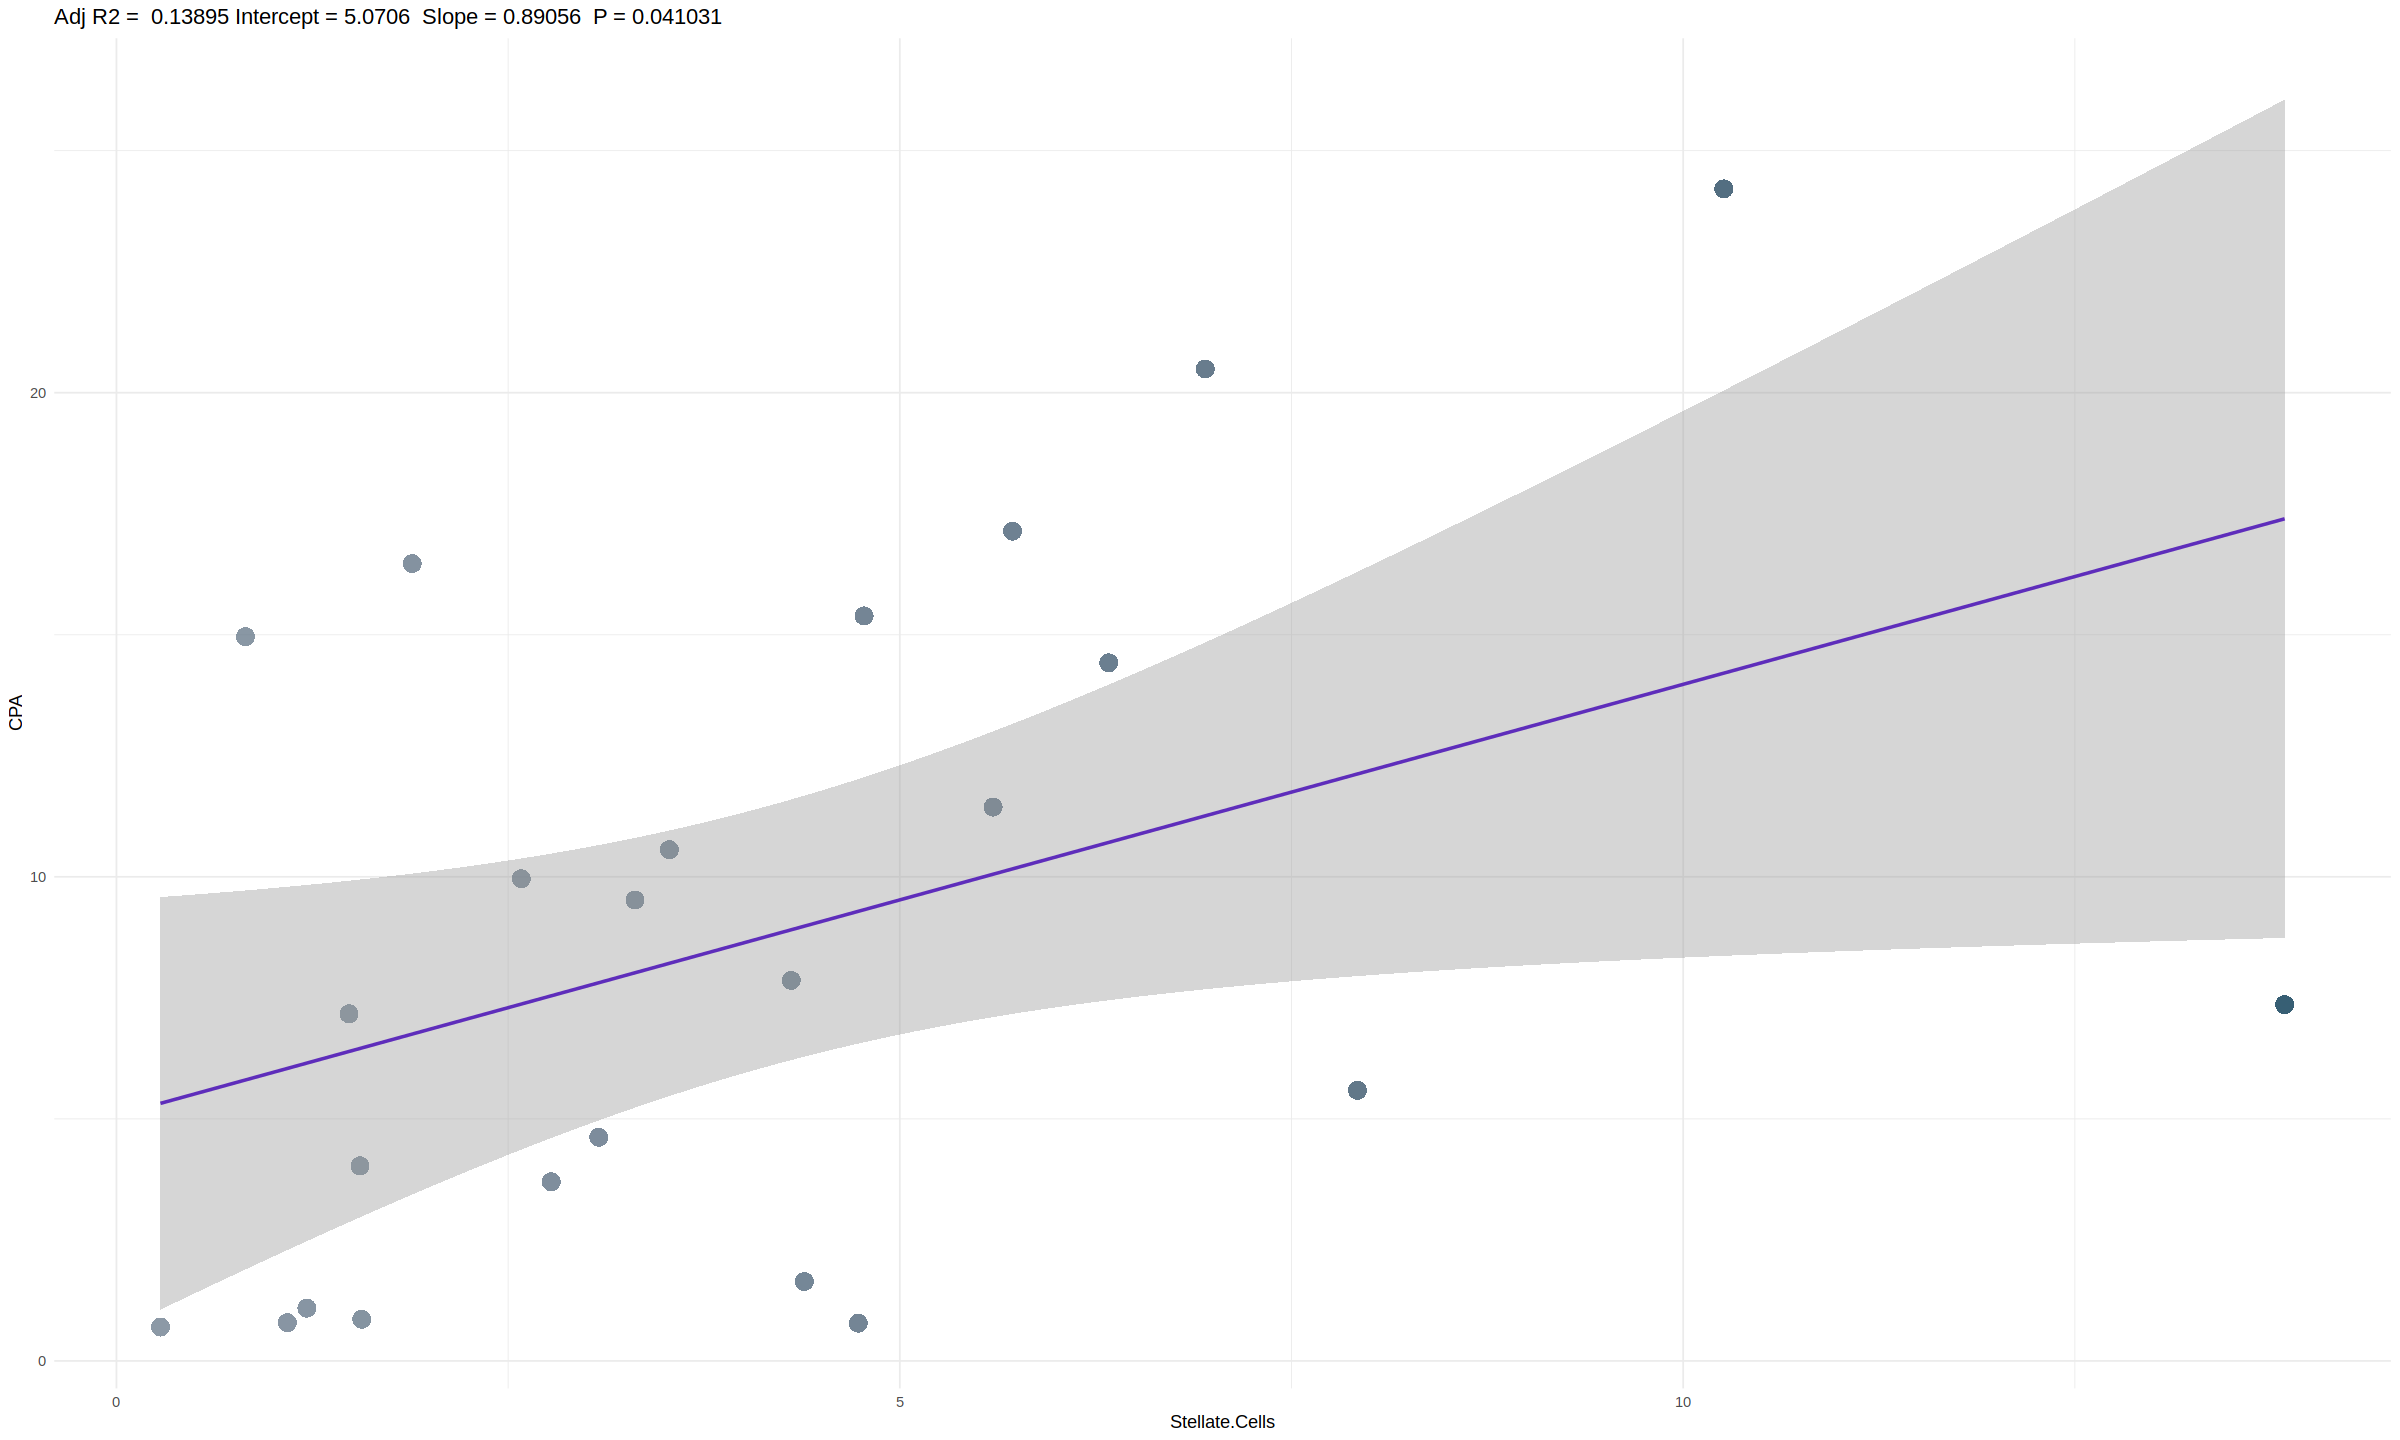

In [53]:
p5

`geom_smooth()` using formula = 'y ~ x'


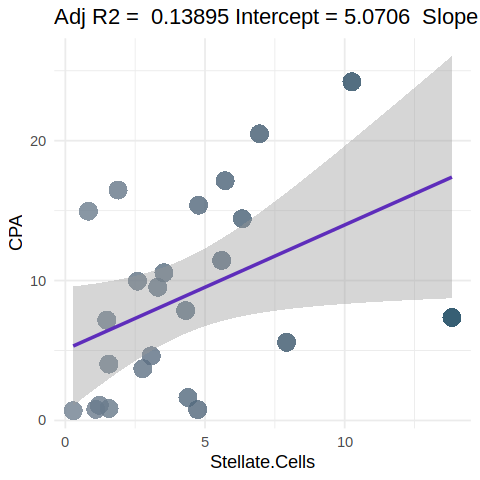

In [54]:
options(repr.plot.width = 4, repr.plot.height = 4)
p5

In [66]:
p7 <- ggplotRegression_taa(lm_taa_cpa_hsc2)
p8 <- ggplotRegression_taa(lm_taa_cpa_mf)
p9 <- ggplotRegression_taa(lm_taa_cpa_hc)
p10 <- ggplotRegression_taa(lm_taa_s_cpa_hc)
p11 <- ggplotRegression_taa(lm_taa_s_cpa_mf)
p12 <- ggplotRegression_taa(lm_taa_s_cpa_hsc)
p13 <- ggplotRegression_taa(lm_taa_s_cpa_kc)
p14 <- ggplotRegression_taa(lm_taa_s_pp_ec)
p15 <- ggplotRegression_taa(lm_taa_cpa_ec)
p16 <- ggplotRegression_taa(lm_taa_s_cpa_ec)
p17 <- ggplotRegression_taa(lm_taa_pp_hc)
p18 <- ggplotRegression_taa(lm_taa_s_pp_hc)
p19 <- ggplotRegression_taa(lm_taa_pp_hsc)
p20 <- ggplotRegression_taa(lm_taa_pp_ec)
p21 <- ggplotRegression_taa(lm_taa_pp_mf)

`geom_smooth()` using formula = 'y ~ x'


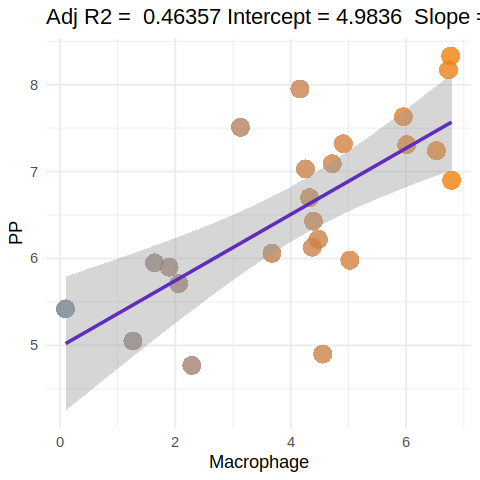

In [67]:
p21

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


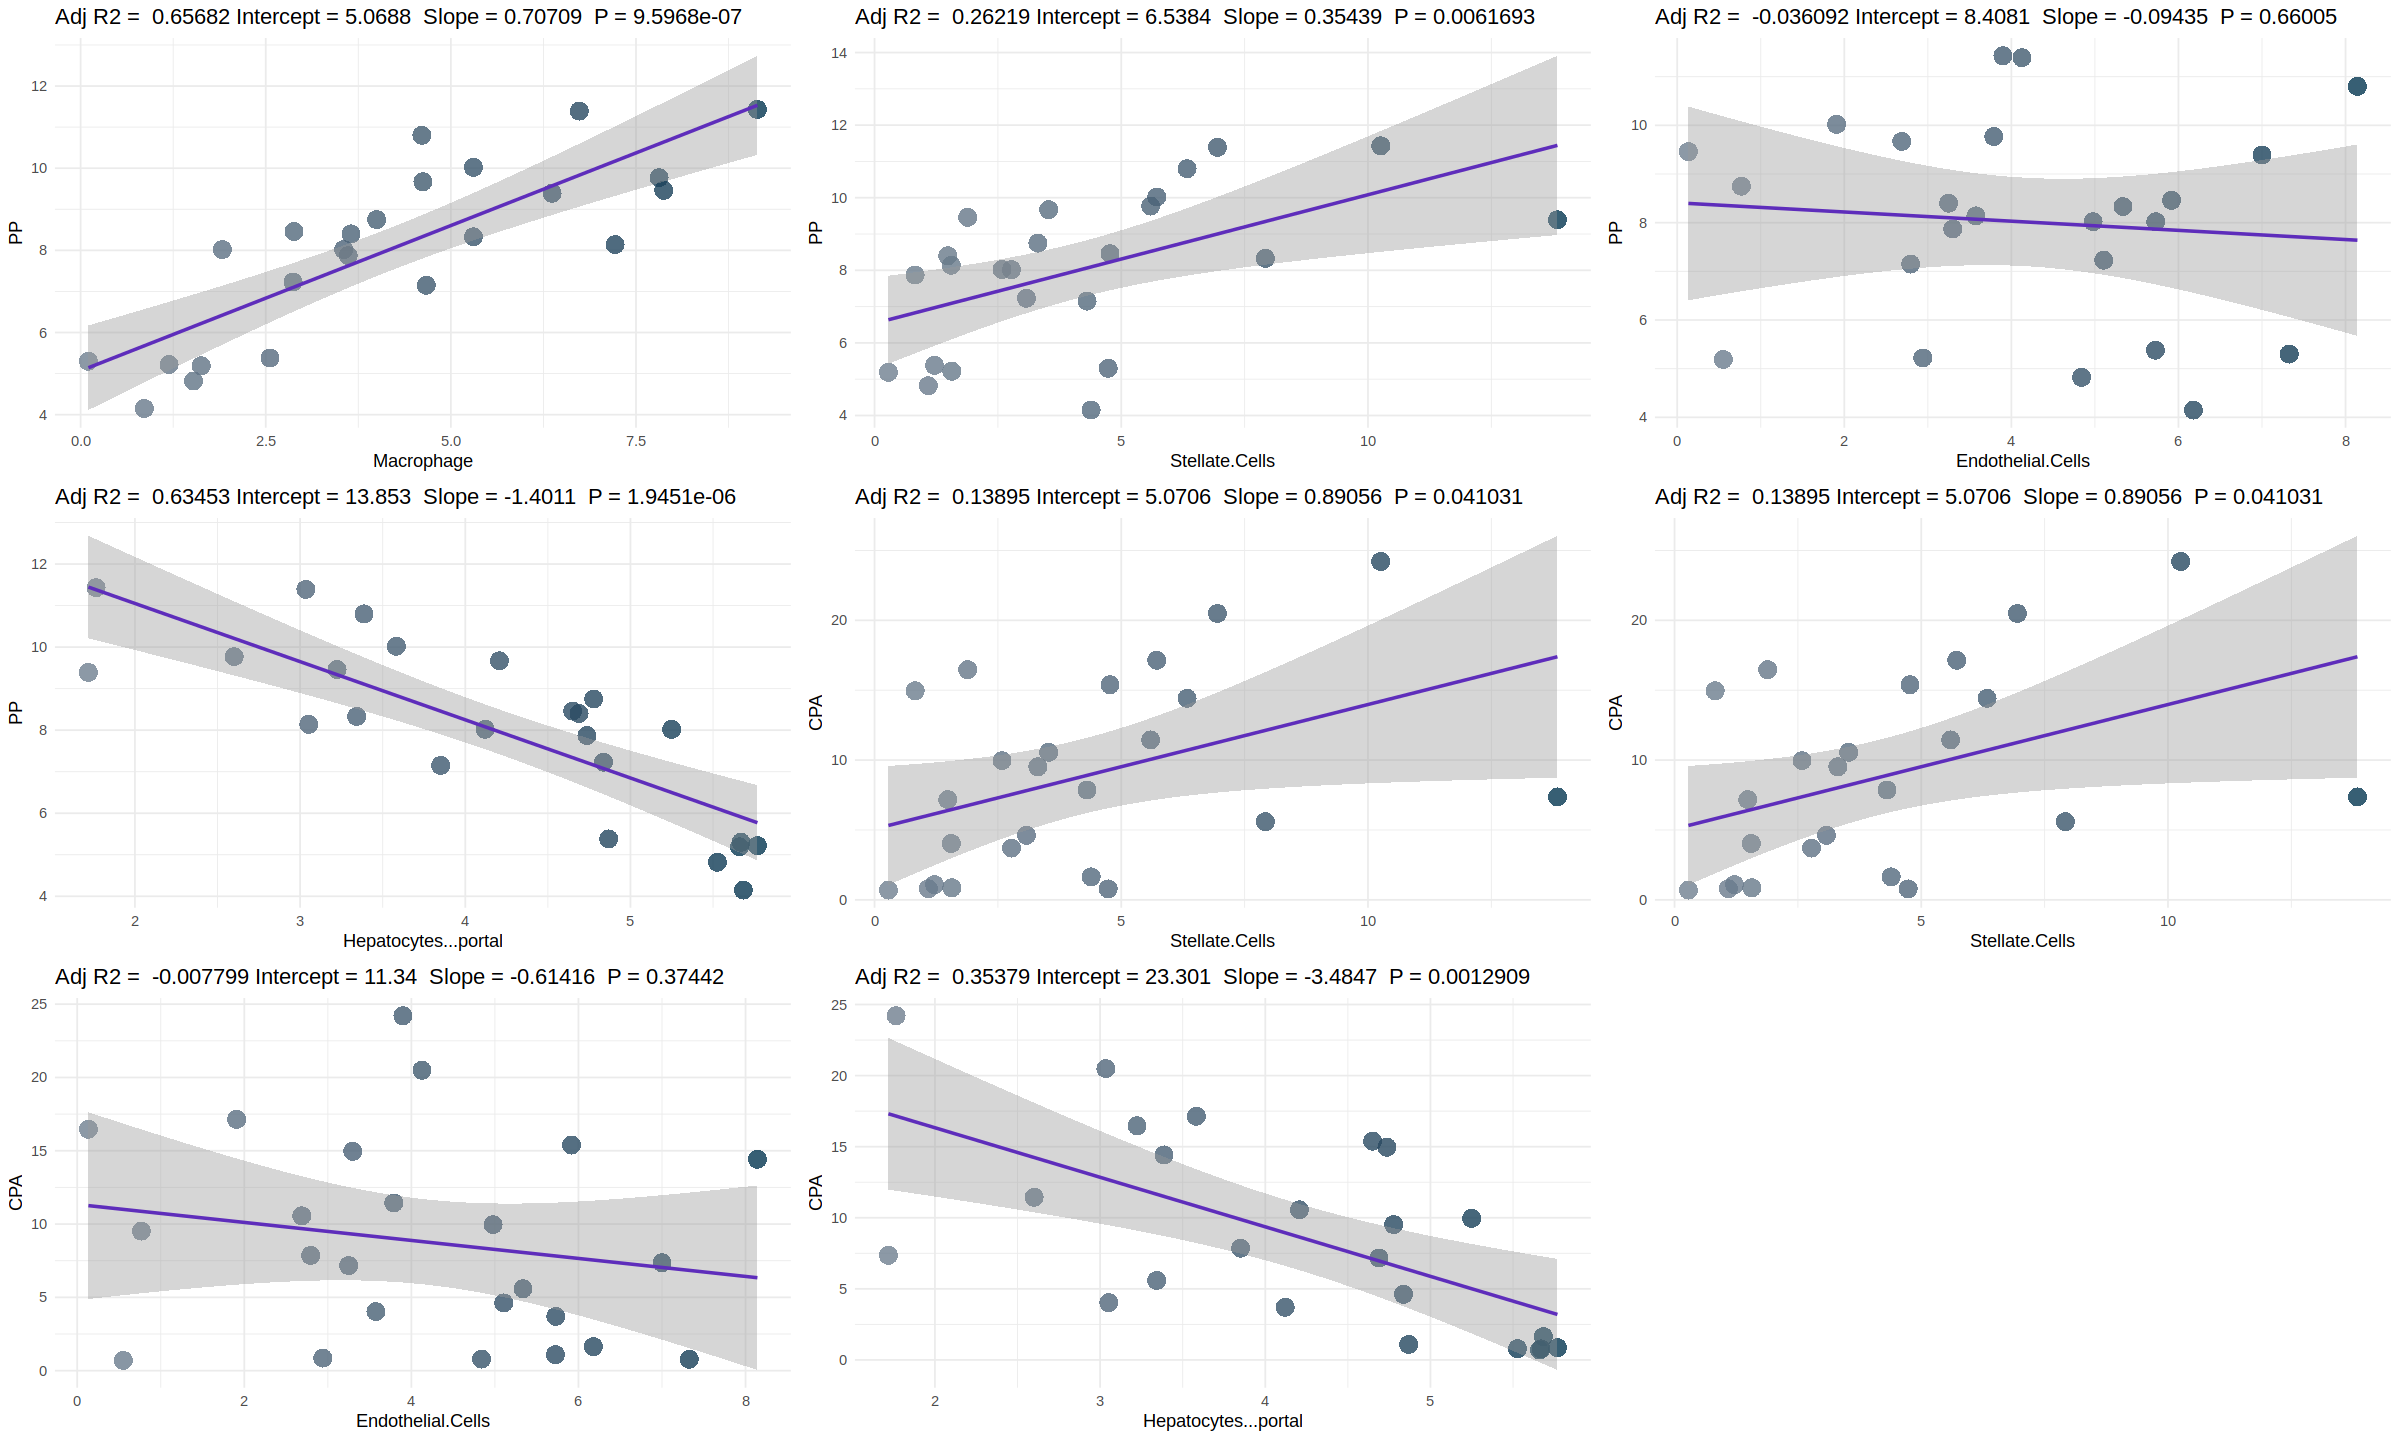

In [49]:
options(repr.plot.width = 20, repr.plot.height = 12)
ggpubr::ggarrange(p1, p6_11, p6_12, p2, 
                    p5, p6_5, p6_8, p6_10)

In [ ]:
p7 <- ggplotRegression_taa(lm_taa_cpa_hsc2)
p8 <- ggplotRegression_taa(lm_taa_cpa_mf)
p9 <- ggplotRegression_taa(lm_taa_cpa_hc)
p10 <- ggplotRegression_taa(lm_taa_s_cpa_hc)
p11 <- ggplotRegression_taa(lm_taa_s_cpa_mf)
p12 <- ggplotRegression_taa(lm_taa_s_cpa_hsc)
p13 <- ggplotRegression_taa(lm_taa_s_cpa_kc)
p14 <- ggplotRegression_taa(lm_taa_s_pp_ec)
p15 <- ggplotRegression_taa(lm_taa_cpa_ec)
p16 <- ggplotRegression_taa(lm_taa_s_cpa_ec)
p17 <- ggplotRegression_taa(lm_taa_pp_hc)
p18 <- ggplotRegression_taa(lm_taa_s_pp_hc)
p19 <- ggplotRegression_taa(lm_taa_pp_hsc)
p20 <- ggplotRegression_taa(lm_taa_pp_ec)
p21 <- ggplotRegression_taa(lm_taa_pp_ec)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


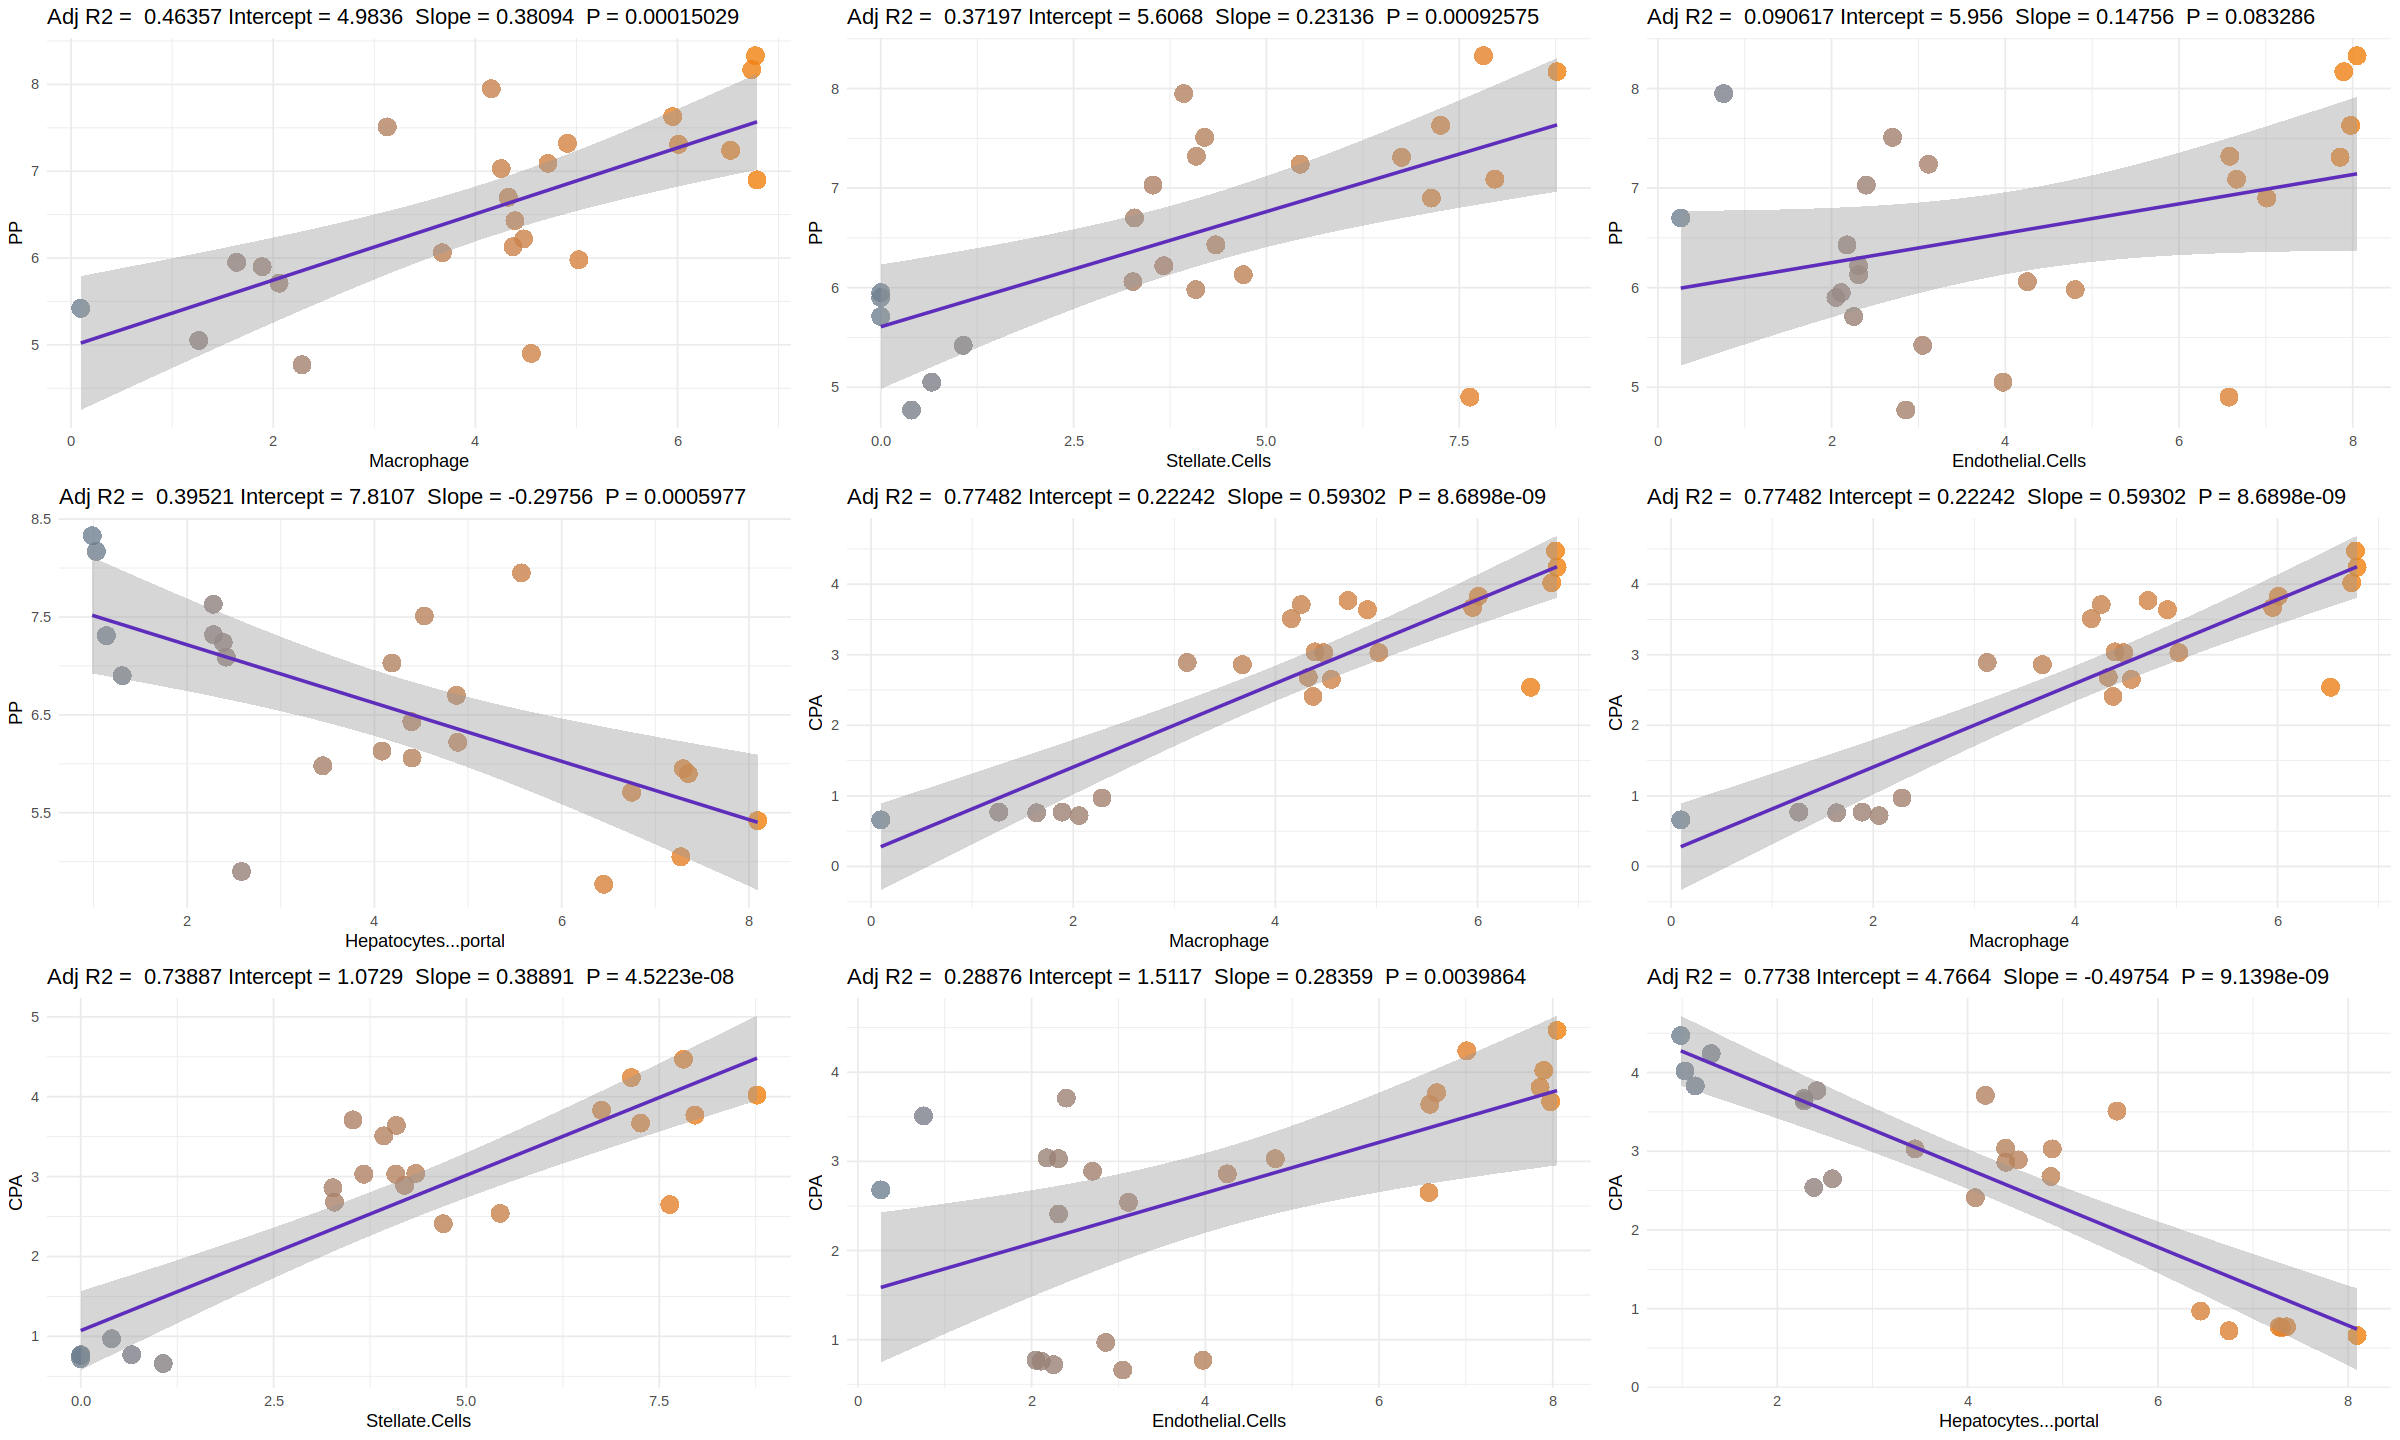

In [68]:
options(repr.plot.width = 20, repr.plot.height = 12)
ggpubr::ggarrange(p21, p19, p20, p17, p11, p8, p12, p16, p9)

In [ ]:
ggplotRegression <- function (fit) {
ggplot(fit$model, aes_string(x = names(fit$model)[2], y = names(fit$model)[1], color = names(fit$model)[2])) + 
  geom_point(shape = 16, size = 5, alpha = 0.8, show.legend = FALSE) +
  stat_smooth(method = "lm", col = "#5e2dbb") +
  labs(title = paste("Adj R2 = ",signif(summary(fit)$adj.r.squared, 5),
                     "Intercept =",signif(fit$coef[[1]],5 ),
                     " Slope =",signif(fit$coef[[2]], 5),
                     " P =",signif(summary(fit)$coef[2,4], 5))) +
                     theme_minimal() +
  scale_color_gradient(low = "#f7bb97", high = "#753a88")
}

ggplotRegression(linear_model_pp_hsc)

## Outputs